# Modelagem de features e Criação do Modelo

## Neste notebook realizaremos etapas para a construção de um modelo preditivo, cujo objetivo é generalizar uma classificação de churn baseado no perfil de compra dos clientes.

### Etapas
1. Carregamento dos dados processados
2. Realizar teste de independência entre as variáveis categóricas e a variável alvo (Churn) e ajustes baseados nos resultados
3. Encoding das variáveis
4. Treinamento e seleção de modelos preditivos
5. Análises de métricas pensando no objetivo do case proposto

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

import warnings
warnings.filterwarnings("ignore")

#### Carregamento dos Dados

In [17]:
# Load the data
customer_churn_processed = pd.read_csv('../data/processed/customer_churn_processed.csv')
customer_churn_processed

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,1,1,72,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),118.75,8672.45,0
1,1,0,0,0,71,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Electronic check,118.65,8477.60,0
2,1,0,1,0,68,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Mailed check,118.60,7990.05,0
3,1,0,0,0,61,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,One year,Yes,Electronic check,118.60,7365.70,0
4,0,0,0,0,67,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),118.35,7804.15,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,0,0,53,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,18.70,1005.70,0
7039,1,0,1,1,25,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Mailed check,18.70,383.65,0
7040,0,0,0,0,36,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Credit card (automatic),18.55,689.00,0
7041,1,0,1,0,59,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),18.40,1057.85,0


#### Teste Qui-Quadrado
O teste Qui-Quadrado é um teste estatístico que tem como objetivo determinar se existe uma associação entre variáveis categóricas e se elas são significativas baseadas num alpha (5% referente ao intervalo de confiança). É um teste não paramétrico

No código a seguir realizamos essa comparação entre as features categóricas e a variável alvo(Churn), além de aplicarmos uma correção devido ao alto número de testes.

https://libguides.library.kent.edu/SPSS/ChiSquare

In [18]:
# 1. Teste Qui-Quadrado de Independência
categorical_columns = ['PhoneService', 'MultipleLines', 'InternetService', 
                       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
                       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 
                       'PaperlessBilling', 'PaymentMethod']

num_tests = len(categorical_columns)

alpha = 0.05

bonferroni_alpha = alpha / num_tests

print(f'Nível de significância ajustado com Bonferroni: {bonferroni_alpha}')


for col in categorical_columns:
    table = pd.crosstab(customer_churn_processed[col], customer_churn_processed['Churn'])
    chi2, p, dof, ex = chi2_contingency(table)
    print(f"{col} - p-value: {p} - {'Significant' if p < bonferroni_alpha else 'Not significant'}")
    
    

Nível de significância ajustado com Bonferroni: 0.004166666666666667
PhoneService - p-value: 0.3387825358066928 - Not significant
MultipleLines - p-value: 0.0034643829548773 - Significant
InternetService - p-value: 9.571788222840544e-160 - Significant
OnlineSecurity - p-value: 2.661149635176552e-185 - Significant
OnlineBackup - p-value: 2.0797592160864276e-131 - Significant
DeviceProtection - p-value: 5.505219496457244e-122 - Significant
TechSupport - p-value: 1.4430840279998987e-180 - Significant
StreamingTV - p-value: 5.528994485739183e-82 - Significant
StreamingMovies - p-value: 2.667756755723681e-82 - Significant
Contract - p-value: 5.863038300673391e-258 - Significant
PaperlessBilling - p-value: 4.073354668665985e-58 - Significant
PaymentMethod - p-value: 3.6823546520097993e-140 - Significant


### PhoneService nos serviu para a análise exploratória, mas não apresenta significância de acordo com as outras, então não a usaremos

In [19]:
customer_churn_processed.drop(columns=['PhoneService'], inplace=True)

### Agora codificaremos o restante das variáveis com 3 entradas

In [20]:
customer_churn_processed['PaperlessBilling'] = customer_churn_processed['PaperlessBilling'].map({'Yes': 1, 'No': 0})

In [21]:
customer_churn_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   int64  
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   int64  
 3   Dependents        7043 non-null   int64  
 4   tenure            7043 non-null   int64  
 5   MultipleLines     7043 non-null   object 
 6   InternetService   7043 non-null   object 
 7   OnlineSecurity    7043 non-null   object 
 8   OnlineBackup      7043 non-null   object 
 9   DeviceProtection  7043 non-null   object 
 10  TechSupport       7043 non-null   object 
 11  StreamingTV       7043 non-null   object 
 12  StreamingMovies   7043 non-null   object 
 13  Contract          7043 non-null   object 
 14  PaperlessBilling  7043 non-null   int64  
 15  PaymentMethod     7043 non-null   object 
 16  MonthlyCharges    7043 non-null   float64


In [22]:
categorical_columns = customer_churn_processed.select_dtypes(include='object').columns

for col in categorical_columns:
    dummies = pd.get_dummies(customer_churn_processed[col], prefix=col)
    customer_churn_processed = pd.concat([customer_churn_processed, dummies], axis=1)
    customer_churn_processed = customer_churn_processed.drop(columns=col)

In [23]:
customer_churn_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 40 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   gender                                   7043 non-null   int64  
 1   SeniorCitizen                            7043 non-null   int64  
 2   Partner                                  7043 non-null   int64  
 3   Dependents                               7043 non-null   int64  
 4   tenure                                   7043 non-null   int64  
 5   PaperlessBilling                         7043 non-null   int64  
 6   MonthlyCharges                           7043 non-null   float64
 7   TotalCharges                             7043 non-null   float64
 8   Churn                                    7043 non-null   int64  
 9   MultipleLines_No                         7043 non-null   bool   
 10  MultipleLines_No phone service           7043 no

#### Salvando os dados para uso futuro

In [24]:
pd.DataFrame.to_csv(customer_churn_processed, '../data/interim/customer_churn_processed_transformed.csv', index=False)

#### Treinamento e seleção de modelos preditivos

In [25]:
from sklearn.model_selection import train_test_split

X = customer_churn_processed.drop('Churn', axis=1)
y = customer_churn_processed['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


##### Aqui usaremos lazyPredict para testarmos vários modelos e obtermos uma visão geral de desempenho
para mais informações: https://lazypredict.readthedocs.io

In [26]:
import lazypredict
from lazypredict.Supervised import LazyClassifier

clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)

models

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 29/29 [00:03<00:00,  8.81it/s]

[LightGBM] [Info] Number of positive: 1494, number of negative: 4140
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000091 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 599
[LightGBM] [Info] Number of data points in the train set: 5634, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265176 -> initscore=-1.019239
[LightGBM] [Info] Start training from score -1.019239


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
QuadraticDiscriminantAnalysis,0.76,0.74,0.74,0.77,0.01
NearestCentroid,0.69,0.71,0.71,0.71,0.01
AdaBoostClassifier,0.79,0.71,0.71,0.79,0.12
Perceptron,0.73,0.70,0.70,0.74,0.01
GaussianNB,0.76,0.70,0.70,0.76,0.01
LabelSpreading,0.78,0.70,0.70,0.78,0.58
LGBMClassifier,0.79,0.69,0.69,0.78,0.09
LinearDiscriminantAnalysis,0.78,0.69,0.69,0.77,0.01
LabelPropagation,0.78,0.69,0.69,0.77,0.38


### Escolhi LIGHTGBMClassifier, baseado na acurácia e F1-Score, que pode ser ajustado para o nosso problema, onde é preferível a classe positiva.
- Melhor prever um churn como falso do que perder um cliente

In [27]:
import lightgbm
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

lgbm_clf = lightgbm.LGBMClassifier(random_state=42, class_weight='balanced')
lgbm_clf.fit(X_train, y_train)

predictions = lgbm_clf.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
recall = recall_score(y_test, predictions)
precision = precision_score(y_test, predictions)
f1 = f1_score(y_test, predictions)

print(f'Accuracy: {accuracy}')
print(f'Recall: {recall}')
print(f'Precision: {precision}')
print(f'F1: {f1}')

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1494, number of negative: 4140
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000366 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 655
[LightGBM] [Info] Number of data points in the train set: 5634, number of used features: 39
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
Accuracy: 0.752306600425834
Recall: 0.7413333333333333
Precision: 0.5245283018867924
F1: 0.6143646408839779


##### Matriz de confusão e Curva ROC-AUC antes da otimização de parâmetros com o objetivo de comparar resultados
Devido a natureza do problema proposto, foi importante usar uma estratégia de equilíbrio de classes além de procurar ter mais resultados falso positivos, já que é mais benéfico previnir um cliente dar churn do que deixar passar uma possível perda

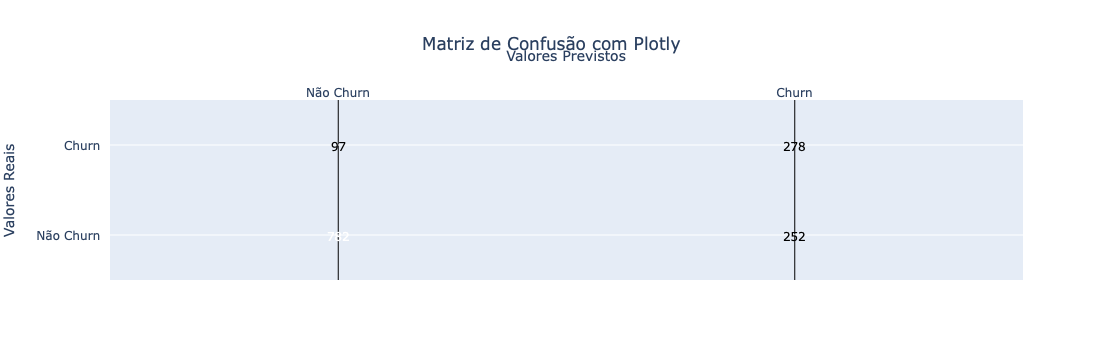

In [28]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predictions)

import plotly.figure_factory as ff

# Criando os rótulos para os eixos
x_axis_labels = ['Não Churn', 'Churn']  # rótulos para as colunas
y_axis_labels = ['Não Churn', 'Churn']  # rótulos para as linhas

# Criando a figura do Plotly
fig = ff.create_annotated_heatmap(cm, x=x_axis_labels, y=y_axis_labels, colorscale='Blues')

# Adicionando títulos
fig.update_layout(title_text='Matriz de Confusão com Plotly', title_x=0.5,
                  xaxis=dict(title='Valores Previstos'),
                  yaxis=dict(title='Valores Reais'))

# Adicionando anotações de texto
annotations = []
for i, row in enumerate(cm):
    for j, value in enumerate(row):
        annotations.append(dict(x=x_axis_labels[j], y=y_axis_labels[i],
                                text=str(value), showarrow=False))
fig.update_layout(annotations=annotations)

# Mostrar figura
fig.show()


AUC: 0.8347221147646681


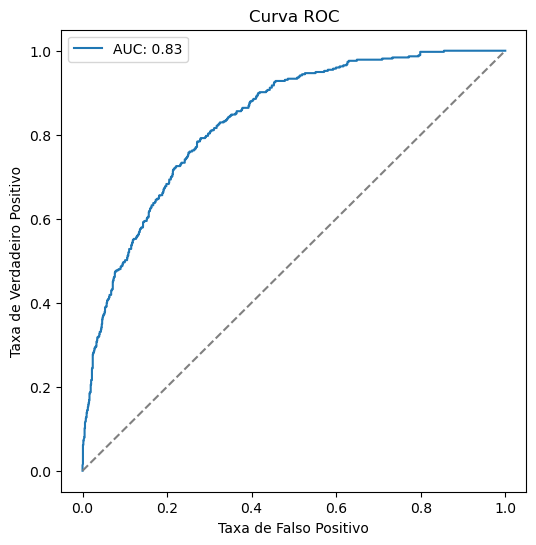

              precision    recall  f1-score   support

           0       0.89      0.76      0.82      1034
           1       0.52      0.74      0.61       375

    accuracy                           0.75      1409
   macro avg       0.71      0.75      0.72      1409
weighted avg       0.79      0.75      0.76      1409



In [29]:
from sklearn.metrics import roc_auc_score, roc_curve, classification_report

# Calcula as probabilidades de predição
y_probs = lgbm_clf.predict_proba(X_test)[:, 1]

# Calcula a AUC
roc_value = roc_auc_score(y_test, y_probs)
print(f'AUC: {roc_value}')

# Calcula a curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Cria a figura do Plotly
fig = plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, label=f'AUC: {roc_value:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('Taxa de Falso Positivo')
plt.ylabel('Taxa de Verdadeiro Positivo')
plt.title('Curva ROC')
plt.legend()
plt.show()

# Imprime o relatório de classificação
print(classification_report(y_test, predictions))

##### Otimização de parâmetros utilizando grid-search

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7, 10],
    'colsample_bytree': [0.7, 0.8, 1],
    'subsample': [0.7, 0.8, 1]
}

grid_search = GridSearchCV(estimator=lgbm_clf, param_grid=param_grid, scoring='recall', cv=5)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print(f"Melhores parâmetros: {best_params}")

best_model = grid_search.best_estimator_
best_predictions = best_model.predict(X_test)

best_accuracy = accuracy_score(y_test, best_predictions)
best_recall = recall_score(y_test, best_predictions)
best_precision = precision_score(y_test, best_predictions)
best_f1 = f1_score(y_test, best_predictions)

print(f"Melhor Acurácia: {best_accuracy}")
print(f"Melhor Recall: {best_recall}")
print(f"Melhor Precisão: {best_precision}")
print(f"Melhor F1 Score: {best_f1}")


##### Métricas para comparação

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_predictions)

import plotly.figure_factory as ff

# Criando os rótulos para os eixos
x_axis_labels = ['Não Churn', 'Churn']  # rótulos para as colunas
y_axis_labels = ['Não Churn', 'Churn']  # rótulos para as linhas

# Criando a figura do Plotly
fig = ff.create_annotated_heatmap(cm, x=x_axis_labels, y=y_axis_labels, colorscale='Blues')

# Adicionando títulos
fig.update_layout(title_text='Matriz de Confusão com Plotly', title_x=0.5,
                  xaxis=dict(title='Valores Previstos'),
                  yaxis=dict(title='Valores Reais'))

# Adicionando anotações de texto
annotations = []
for i, row in enumerate(cm):
    for j, value in enumerate(row):
        annotations.append(dict(x=x_axis_labels[j], y=y_axis_labels[i],
                                text=str(value), showarrow=False))
fig.update_layout(annotations=annotations)

# Mostrar figura
fig.show()


In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve, classification_report

# Calcula as probabilidades de predição
y_probs = best_model.predict_proba(X_test)[:, 1]

# Calcula a AUC
roc_value = roc_auc_score(y_test, y_probs)
print(f'AUC: {roc_value}')

# Calcula a curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Cria a figura do Plotly
fig = plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, label=f'AUC: {roc_value:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('Taxa de Falso Positivo')
plt.ylabel('Taxa de Verdadeiro Positivo')
plt.title('Curva ROC')
plt.legend()
plt.show()

# Imprime o relatório de classificação
print(classification_report(y_test, best_predictions))

## Conclusões gerais

O modelo desenvolvido generalizou bem, assumindo uma taxa maior de falso negativos como discutido anteriormente, além da otimização de parâmetros nos dar uma visão maior entre o sacrifício que ocorre no balanço das predições referente ao que for mais benéfico para o negócio. Por exemplo, sacrificamos um pouco a precisão em detrimento do recall, o que na otimização levou a um aumento significativo dos falsos positivos, mas pode ser um pouco além da conta porque estamos tentando previnir e não jogar todos para uma classe só.

Logo, optei por continuar com os parâmetros padrões, pois apresentaram uma precisão maior e pelas métricas esse sacríficio não prejudica a predição